In [1]:
import minerl
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
data = minerl.data.make(
    'MineRLObtainDiamond-v0',
    data_dir='/app/code/minerl-data')
acts_exc_cam = ['attack', 'back', 'craft', 'equip', 'forward', 'jump', 'left', 'nearbyCraft', 'nearbySmelt', 'place', 'right', 'sneak', 'sprint']

In [7]:
data_iter = data.sarsd_iter(max_sequence_len=32, num_epochs=1)
all_actions = []

In [80]:
for i in tqdm(range(3000)):
    current_state, action, reward, next_state, done = next(data_iter)
    act_exc = np.stack( [action[i] for i in acts_exc_cam] ).T
    actions = np.append(act_exc, action['camera'], axis=1)
    all_actions.append(actions)

100%|██████████| 3000/3000 [00:54<00:00, 23.42it/s] 


In [81]:
all_actions_np = np.concatenate(all_actions)

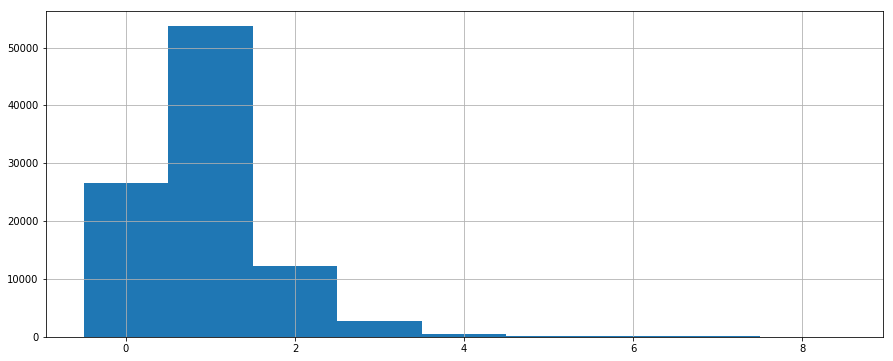

In [82]:
# How many simultaneous actions

plt.figure(figsize=(15,6))
plt.grid()
p = plt.hist( all_actions_np[:, 0:-2].sum(1), bins=9, align='left')

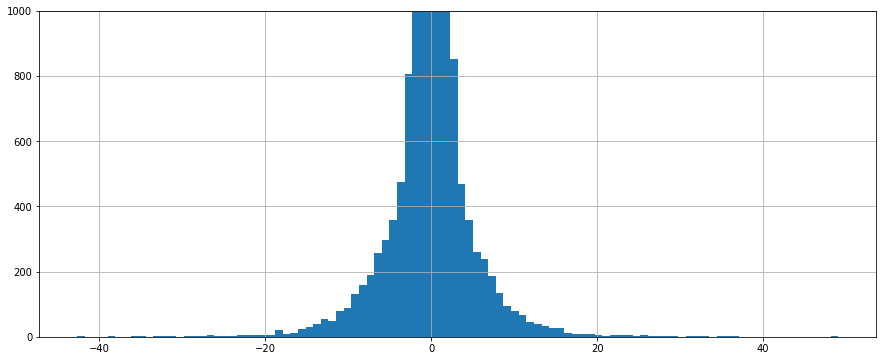

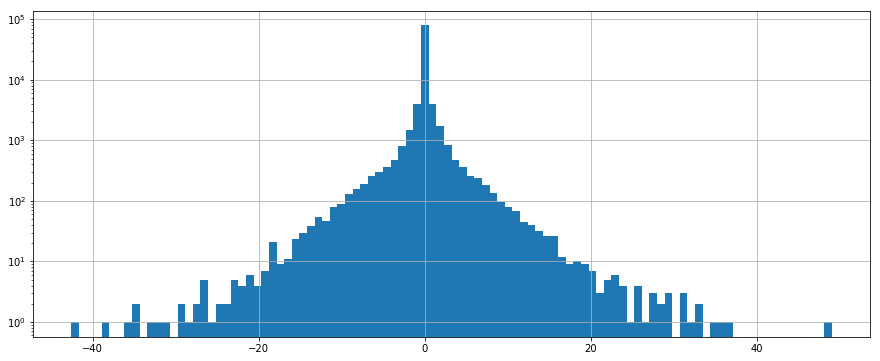

In [83]:
plt.figure(figsize=(15,6))
plt.grid()
p = plt.hist( all_actions_np[:, -2], bins=100)
plt.ylim([0,1000])

plt.figure(figsize=(15,6))
plt.grid()
p = plt.hist( all_actions_np[:, -2], bins=100)
plt.yscale('log')

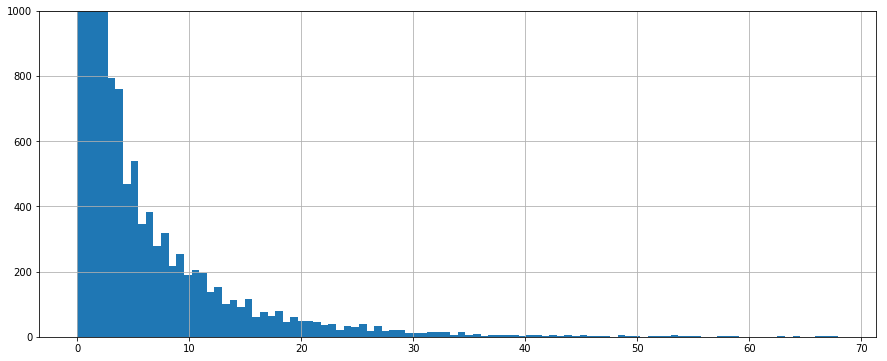

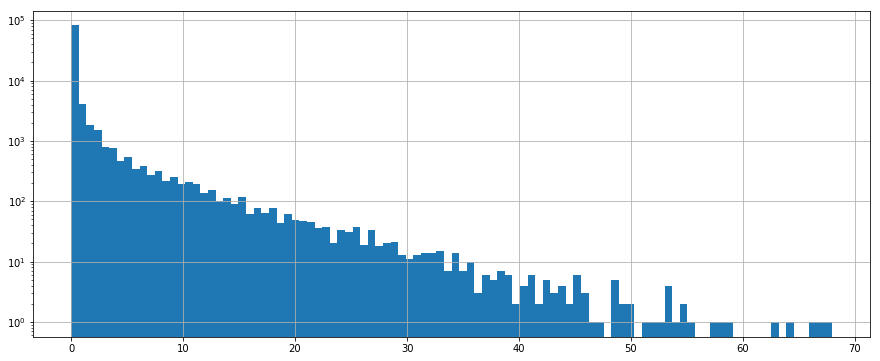

In [84]:
plt.figure(figsize=(15,6))
plt.grid()
p = plt.hist( np.abs( all_actions_np[:, -1] ), bins=100)
plt.ylim([0,1000])

plt.figure(figsize=(15,6))
plt.grid()
p = plt.hist( np.abs(all_actions_np[:, -1]), bins=100)
plt.yscale('log')

In [89]:
all_actions_np_ = all_actions_np.copy()
all_actions_np_[:,-2:] = (all_actions_np[:,-2:]>5) & (all_actions_np[:,-2:]<15)
all_actions_np_ = np.append(all_actions_np_, (all_actions_np[:,-2:]<-5) & (all_actions_np[:,-2:]>-15), axis=1)
all_actions_np_ = np.append(all_actions_np_, (all_actions_np[:,-2:]>=15) & (all_actions_np[:,-2:]<30), axis=1)
all_actions_np_ = np.append(all_actions_np_, (all_actions_np[:,-2:]<=-15) & (all_actions_np[:,-2:]>-30), axis=1)

In [90]:
act_str = []
for i in tqdm(all_actions_np_): 
    act_str.append(str(i))

most_frequent = pd.DataFrame( act_str ).groupby(0).size()

100%|██████████| 95880/95880 [00:39<00:00, 2425.19it/s]


In [91]:
# most common actions
actions_with_cam = acts_exc_cam + ['c_down', 'c_right','c_up','c_left', 'c_down_L', 'c_right_L','c_up_L','c_left_L',]
most_frequent_sorted = most_frequent.sort_values(ascending=False)
actions_by_freq = []
print('num of action combinations:', len(most_frequent_sorted) )
for i in list( most_frequent_sorted.index ):
    actions_named = np.array(actions_with_cam)[ np.nonzero( eval(i.replace('.',',')) ) ]
    actions_by_freq.append(list(actions_named))
    print( actions_named ,most_frequent_sorted[i] / most_frequent_sorted.sum() *100)

num of action combinations: 508
['attack'] 44.65790571547768
[] 25.65811430955361
['forward'] 6.422611597830621
['forward' 'jump'] 3.8871506049228204
['attack' 'forward'] 2.86816854401335
['attack' 'sneak'] 1.5248226950354609
['sneak'] 1.2943262411347518
['forward' 'sprint'] 0.8437630371297454
['attack' 'forward' 'sneak'] 0.6320400500625782
['attack' 'c_up'] 0.46099290780141844
['c_right'] 0.44847726324572385
['back' 'sneak'] 0.42240300375469336
['c_left'] 0.4213600333750522
['attack' 'c_down'] 0.41614518147684604
['forward' 'right'] 0.4057154776804339
['forward' 'left'] 0.40258656654151026
['forward' 'sneak'] 0.3712974551522737
['forward' 'jump' 'right'] 0.2920317062995411
['forward' 'jump' 'sprint'] 0.2805590321234877
['forward' 'c_left'] 0.26595744680851063
['forward' 'jump' 'left'] 0.25135586149353356
['place' 'sneak'] 0.24926992073425114
['forward' 'c_right'] 0.24301209845640384
['attack' 'left'] 0.2419691280767626
['attack' 'c_right'] 0.23988318731748018
['right'] 0.2221526908635

In [92]:
[['attack'],
 [],
 ['forward'],
 ['forward', 'jump'],
 ['attack', 'forward'],
 ['attack', 'sneak'],
 ['sneak'],
 ['forward', 'sprint'],
 ['attack', 'forward', 'sneak'],
 ['attack', 'c_up'],
 ['attack', 'c_down'],
 ['c_right'],
 ['c_left'],
 
 ['back', 'sneak'],

 ['forward', 'right'],
 ['forward', 'left'],
 ['forward', 'sneak'],
 
 ['forward', 'jump', 'right'],
 ['forward', 'jump', 'left'],

 ['forward', 'jump', 'sprint'],
 ['forward', 'c_left'],
 ['forward', 'c_right'],
 
 ['place', 'sneak'], # place and sneak?

 ['attack', 'left'],
 ['attack', 'right'],
 ['attack', 'c_right'],
 ['attack', 'c_left'],
 ['right'],
 ['left'],
 
 ['attack', 'back'],
 ['back'],
 
 ['c_down'],
 ['c_up'],
 
 ['attack', 'forward', 'left'],
 ['attack', 'forward', 'right'],

 ['c_right_L'],
 ['c_left_L'],
 
 
 
 ['attack', 'forward', 'jump'],
 ['forward', 'jump', 'c_right'],
 ['forward', 'right', 'sneak'],
 ['forward', 'jump', 'c_left'],
 ['attack', 'back', 'left'],
 ['attack', 'forward', 'c_up'],
 ['forward', 'right', 'c_left'],
 ['c_right', 'c_up'],
 ['forward', 'c_down'],
 ['attack', 'forward', 'sprint'],
 ['c_down', 'c_right'],
 ['forward', 'c_up'],
 ['left', 'sneak'],
 ['place'],
 ['right', 'sneak'],
 ['c_up', 'c_left'],
 ['forward', 'left', 'sneak'],
 ['forward', 'c_right_L'],
 ['back', 'right', 'sneak'],
 ['sneak', 'c_left'],
 ['c_down', 'c_left'],
 ['place'],
 ['forward', 'place'],
 ['forward', 'left', 'c_right'],
 ['attack', 'c_left_L'],
 ['attack', 'forward', 'c_down'],
 ['back', 'left'],
 ['forward', 'c_left_L'],
 ['craft'],
 ['c_up', 'c_right_L'],
 ['forward', 'right', 'sprint'],
 ['attack', 'c_up_L'],
 ['attack', 'forward', 'left', 'c_right'],
 ['attack', 'back', 'sneak'],
 ['attack', 'c_right', 'c_up'],
 ['attack', 'forward', 'jump', 'left'],
 ['back', 'right'],
 ['c_down_L'],
 ['back', 'left', 'sneak'],
 ['back', 'place', 'sneak'],
 ['forward', 'jump', 'c_up'],
 ['c_down', 'c_right_L'],
 ['right', 'c_left'],
 ['sneak', 'c_right'],
 ['sneak', 'c_up'],
 ['place'],
 ['attack', 'right', 'sneak'],
 ['forward', 'left', 'sprint'],
 ['craft'],
 ['left', 'c_right'],
 ['forward', 'c_right', 'c_up'],
 ['jump', 'left'],
 ['attack', 'forward', 'right', 'c_left'],
 ['right', 'c_right'],
 ['forward', 'jump', 'c_left_L'],
 ['attack', 'c_right_L'],
 ['forward', 'jump', 'c_down'],
 ['jump'],
 ['forward', 'right', 'c_right'],
 ['c_up', 'c_left_L'],
 ['sneak', 'c_down'],
 ['forward', 'c_up', 'c_left'],
 ['forward', 'left', 'c_left'],
 ['left', 'c_left'],
 ['nearbyCraft'],
 ['back', 'c_left'],
 ['sneak', 'c_left_L'],
 ['c_down', 'c_left_L'],
 ['forward', 'sprint', 'c_right'],
 ['attack', 'c_down', 'c_left'],
 ['attack', 'c_up', 'c_left'],
 ['left', 'c_left_L'],
 ['jump', 'right'],
 ['forward', 'right', 'c_left_L'],
 ['c_right', 'c_down_L'],
 ['forward', 'c_down', 'c_right'],
 ['forward', 'jump', 'left', 'c_right'],
 ['right', 'c_right_L'],
 ['back', 'right', 'sneak', 'c_left'],
 ['right', 'sneak', 'c_left'],
 ['forward', 'sprint', 'c_left'],
 ['forward', 'jump', 'place'],
 ['c_up_L'],
 ['attack', 'forward', 'sprint', 'c_right'],
 ['forward', 'jump', 'c_up', 'c_left'],
 ['right', 'c_left_L'],
 ['equip'],
 ['attack', 'forward', 'jump', 'right'],
 ['forward', 'left', 'c_right_L'],
 ['left', 'c_right_L'],
 ['forward', 'jump', 'c_right_L'],
 ['forward', 'place', 'sneak'],
 ['attack', 'left', 'c_right'],
 ['attack', 'sneak', 'c_down'],
 ['attack', 'right', 'c_left'],
 ['attack', 'c_down', 'c_right'],
 ['attack', 'forward', 'right', 'sneak'],
 ['attack', 'sneak', 'c_up'],
 ['forward', 'sneak', 'c_right'],
 ['forward', 'c_down', 'c_left'],
 ['forward', 'place'],
 ['sneak', 'c_up', 'c_left'],
 ['attack', 'forward', 'c_left'],
 ['attack', 'c_down_L'],
 ['attack', 'forward', 'sprint', 'c_left'],
 ['forward', 'jump', 'right', 'sprint'],
 ['attack', 'forward', 'sneak', 'c_up'],
 ['forward', 'c_up', 'c_left_L'],
 ['equip'],
 ['forward', 'jump', 'right', 'c_right'],
 ['left', 'c_up'],
 ['attack', 'forward', 'left', 'sneak'],
 ['back', 'jump'],
 ['nearbyCraft'],
 ['nearbySmelt'],
 ['back', 'jump', 'right'],
 ['c_down_L', 'c_right_L'],
 ['forward', 'jump', 'left', 'place'],
 ['forward', 'left', 'c_left_L'],
 ['craft'],
 ['place'],
 ['back', 'left', 'c_left'],
 ['forward', 'right', 'sprint', 'c_left'],
 ['forward', 'jump', 'right', 'c_up'],
 ['craft'],
 ['forward', 'jump', 'left', 'c_left'],
 ['right', 'sneak', 'c_left_L'],
 ['right', 'c_up'],
 ['forward', 'sneak', 'c_up'],
 ['place', 'sneak'],
 ['attack', 'sneak', 'c_left'],
 ['forward', 'right', 'c_right_L'],
 ['attack', 'c_down', 'c_left_L'],
 ['c_right_L', 'c_up_L'],
 ['forward', 'right', 'c_down', 'c_left'],
 ['nearbyCraft'],
 ['nearbyCraft'],
 ['back', 'c_right'],
 ['forward', 'jump', 'c_right', 'c_up'],
 ['sneak', 'c_down_L'],
 ['attack', 'back', 'right'],
 ['forward', 'jump', 'c_down', 'c_left'],
 ['attack', 'forward', 'right', 'c_up', 'c_left'],
 ['right', 'c_up', 'c_left'],
 ['forward', 'right', 'sneak', 'c_left'],
 ['forward', 'sneak', 'c_left'],
 ['c_left', 'c_down_L'],
 ['attack', 'c_up', 'c_left_L'],
 ['sneak', 'c_right_L'],
 ['forward', 'jump', 'right', 'c_left'],
 ['forward', 'right', 'c_down'],
 ['sneak', 'c_down', 'c_left'],
 ['forward', 'jump', 'c_down', 'c_right'],
 ['forward', 'left', 'sneak', 'c_right'],
 ['attack', 'forward', 'jump', 'c_down'],
 ['back', 'c_left_L'],
 ['forward', 'jump', 'sprint', 'c_left'],
 ['equip'],
 ['back', 'left', 'c_right'],
 ['place'],
 ['attack', 'right', 'c_left_L'],
 ['back', 'c_down', 'c_left'],
 ['back', 'left', 'c_left_L'],
 ['back', 'left', 'c_up'],
 ['forward', 'c_down', 'c_right_L'],
 ['sneak', 'c_right', 'c_up'],
 ['attack', 'right', 'c_right'],
 ['sneak', 'c_up', 'c_right_L'],
 ['back', 'c_right_L'],
 ['right', 'c_right', 'c_up'],
 ['attack', 'forward', 'c_right'],
 ['forward', 'left', 'place'],
 ['attack', 'back', 'c_left'],
 ['c_left', 'c_up_L'],
 ['attack', 'c_down', 'c_right_L'],
 ['forward', 'left', 'c_up', 'c_left'],
 ['forward', 'left', 'c_up'],
 ['attack', 'c_right', 'c_up_L'],
 ['back', 'sneak', 'c_left'],
 ['back', 'left', 'c_down'],
 ['back', 'c_down', 'c_right_L'],
 ['jump', 'place'],
 ['back', 'c_down'],
 ['jump', 'sneak'],
 ['right', 'c_down'],
 ['back', 'right', 'sneak', 'c_left_L'],
 ['equip'],
 ['forward', 'jump', 'c_down_L'],
 ['forward', 'sneak', 'c_down', 'c_left'],
 ['attack', 'forward', 'c_up_L'],
 ['left', 'c_right', 'c_up'],
 ['left', 'c_down', 'c_left_L'],
 ['attack', 'back', 'c_left_L'],
 ['back', 'right', 'c_left'],
 ['forward', 'sprint', 'c_down', 'c_right'],
 ['forward', 'c_up_L'],
 ['forward', 'left', 'c_down'],
 ['attack', 'back', 'sneak', 'c_up'],
 ['sneak', 'c_down', 'c_right'],
 ['attack', 'back', 'right', 'sneak'],
 ['attack', 'c_up', 'c_right_L'],
 ['forward', 'jump', 'left', 'c_down', 'c_right'],
 ['jump', 'place', 'right'],
 ['left', 'place', 'sneak'],
 ['place'],
 ['attack', 'left', 'c_left'],
 ['forward', 'place', 'sneak'],
 ['c_up_L', 'c_left_L'],
 ['sprint'],
 ['attack', 'left', 'c_up'],
 ['right', 'c_up', 'c_right_L'],
 ['c_right', 'c_up_L'],
 ['back', 'jump', 'left', 'c_left'],
 ['attack', 'forward', 'c_right', 'c_up'],
 ['forward', 'right', 'c_up'],
 ['forward', 'place', 'sprint'],
 ['right', 'sneak', 'c_down', 'c_left'],
 ['attack', 'equip'],
 ['forward', 'jump', 'c_up_L'],
 ['place', 'right'],
 ['attack', 'equip'],
 ['forward', 'right', 'sneak', 'c_up', 'c_left'],
 ['attack', 'sneak', 'c_left_L'],
 ['forward', 'sneak', 'c_right', 'c_up'],
 ['sneak', 'c_up', 'c_left_L'],
 ['attack', 'right', 'sneak', 'c_right_L'],
 ['forward', 'c_up', 'c_right_L'],
 ['back', 'c_down', 'c_right'],
 ['left', 'sneak', 'c_right'],
 ['forward', 'jump', 'c_down', 'c_right_L'],
 ['forward', 'sprint', 'c_left_L'],
 ['left', 'sneak', 'c_right_L'],
 ['sneak', 'c_down', 'c_left_L'],
 ['forward', 'sneak', 'c_right_L'],
 ['left', 'sneak', 'c_left_L'],
 ['back', 'right', 'c_right'],
 ['back', 'sneak', 'c_right'],
 ['forward', 'jump', 'sneak'],
 ['right', 'c_down_L'],
 ['forward', 'jump', 'sprint', 'c_right'],
 ['attack', 'jump', 'right'],
 ['right', 'sneak', 'c_up', 'c_left'],
 ['forward', 'jump', 'left', 'sprint'],
 ['left', 'sneak', 'c_up'],
 ['forward', 'right', 'sneak', 'c_right'],
 ['right', 'c_right', 'c_up_L'],
 ['forward', 'c_down', 'c_left_L'],
 ['jump', 'place', 'sneak'],
 ['forward', 'right', 'sneak', 'c_down', 'c_left'],
 ['right', 'c_down', 'c_right_L'],
 ['c_down_L', 'c_left_L'],
 ['left', 'c_up', 'c_left_L'],
 ['forward', 'right', 'sprint', 'c_right'],
 ['forward', 'right', 'c_up', 'c_right_L'],
 ['right', 'sneak', 'c_down', 'c_left_L'],
 ['sneak', 'c_up_L'],
 ['sneak', 'c_left', 'c_down_L'],
 ['right', 'sneak', 'c_down', 'c_right_L'],
 ['forward', 'sneak', 'c_down', 'c_right'],
 ['forward', 'sneak', 'c_down'],
 ['left', 'c_down'],
 ['forward', 'sprint', 'c_down'],
 ['forward', 'right', 'c_up', 'c_left'],
 ['forward', 'sneak', 'c_left_L'],
 ['left', 'sneak', 'c_left'],
 ['right', 'sneak', 'c_down', 'c_right'],
 ['forward', 'right', 'c_down', 'c_right'],
 ['forward', 'sprint', 'c_down', 'c_left_L'],
 ['right', 'sneak', 'c_right'],
 ['attack', 'back', 'left', 'c_down'],
 ['back', 'right', 'c_up'],
 ['attack', 'forward', 'left', 'c_up'],
 ['attack', 'forward', 'left', 'c_right_L'],
 ['forward', 'jump', 'right', 'c_left_L'],
 ['back', 'right', 'c_right_L'],
 ['forward', 'jump', 'right', 'sprint', 'c_left'],
 ['forward', 'jump', 'place'],
 ['attack', 'forward', 'right', 'c_down', 'c_left_L'],
 ['forward', 'jump', 'left', 'c_left_L'],
 ['forward', 'jump', 'left', 'c_right_L'],
 ['attack', 'forward', 'right', 'c_left_L'],
 ['attack', 'forward', 'sneak', 'c_right'],
 ['back', 'sneak', 'c_up', 'c_left'],
 ['forward', 'jump', 'left', 'c_down'],
 ['forward', 'jump', 'left', 'place'],
 ['forward', 'jump', 'left', 'place'],
 ['attack', 'forward', 'sprint', 'c_up'],
 ['equip', 'c_left_L'],
 ['attack', 'left', 'c_right_L'],
 ['equip', 'left'],
 ['attack', 'forward', 'c_down', 'c_right'],
 ['attack', 'forward', 'c_down', 'c_left'],
 ['back', 'sneak', 'c_right_L'],
 ['back', 'sneak', 'c_left_L'],
 ['attack', 'left', 'c_up', 'c_left'],
 ['back', 'c_down', 'c_left_L'],
 ['equip', 'forward'],
 ['back', 'c_right', 'c_down_L'],
 ['back', 'c_up'],
 ['attack', 'right', 'c_right_L'],
 ['attack', 'left', 'c_down', 'c_right_L'],
 ['attack', 'sneak', 'c_up', 'c_left'],
 ['attack', 'forward', 'left', 'c_down', 'c_right'],
 ['attack', 'sneak', 'c_down_L'],
 ['forward', 'left', 'sneak', 'c_left'],
 ['attack', 'sneak', 'c_up', 'c_left_L'],
 ['forward', 'jump', 'sprint', 'c_right', 'c_up'],
 ['forward', 'left', 'place', 'sneak'],
 ['forward', 'left', 'c_down', 'c_right'],
 ['attack', 'forward', 'jump', 'right', 'c_left'],
 ['attack', 'back', 'c_up_L'],
 ['attack', 'back', 'c_up'],
 ['back', 'jump', 'left'],
 ['forward', 'jump', 'c_up', 'c_left_L'],
 ['attack', 'forward', 'left', 'c_down'],
 ['forward', 'jump', 'c_down', 'c_left_L'],
 ['attack', 'forward', 'left', 'c_right', 'c_up'],
 ['back', 'jump', 'left', 'c_left_L'],
 ['back', 'forward', 'c_up_L'],
 ['attack', 'c_left', 'c_down_L'],
 ['attack', 'c_right', 'c_down_L'],
 ['place', 'sneak'],
 ['attack', 'sprint'],
 ['back', 'jump', 'right', 'c_right'],
 ['attack', 'sneak', 'c_right_L'],
 ['attack', 'left', 'c_down'],
 ['attack', 'c_left', 'c_up_L'],
 ['right', 'sneak', 'c_left', 'c_down_L'],
 ['attack', 'left', 'c_left_L'],
 ['attack', 'right', 'sneak', 'c_right'],
 ['right', 'c_down', 'c_left_L'],
 ['attack', 'right', 'sneak', 'c_up'],
 ['right', 'sneak', 'c_down'],
 ['attack', 'right', 'c_down'],
 ['attack', 'sneak', 'c_right'],
 ['attack', 'sneak', 'c_down', 'c_right'],
 ['attack', 'right', 'c_up'],
 ['right', 'sneak', 'c_up'],
 ['right', 'sneak', 'c_right_L'],
 ['right', 'c_up', 'c_left_L'],
 ['right', 'sneak', 'c_down_L'],
 ['forward', 'place'],
 ['attack', 'forward', 'sprint', 'c_down', 'c_left_L'],
 ['attack', 'left', 'sneak'],
 ['attack', 'jump', 'right', 'c_right'],
 ['attack', 'forward', 'left', 'c_down', 'c_right_L'],
 ['attack', 'forward', 'left', 'sneak', 'c_up'],
 ['attack', 'forward', 'left', 'sneak', 'c_right'],
 ['attack', 'forward', 'left', 'sneak', 'c_right', 'c_up'],
 ['attack', 'forward', 'jump', 'right', 'c_down', 'c_left_L'],
 ['attack', 'forward', 'jump', 'right', 'c_down', 'c_left'],
 ['attack', 'forward', 'jump', 'left', 'c_down'],
 ['attack', 'back', 'c_up', 'c_left'],
 ['attack', 'back', 'c_down'],
 ['attack', 'back', 'c_down', 'c_left_L'],
 ['attack', 'back', 'c_down', 'c_left'],
 ['attack', 'back', 'sneak', 'c_left_L'],
 ['attack', 'back', 'sneak', 'c_up_L'],
 ['attack', 'back', 'sneak', 'c_down'],
 ['attack', 'back', 'sneak', 'c_down', 'c_left'],
 ['attack', 'back', 'right', 'c_down'],
 ['attack', 'back', 'right', 'c_down', 'c_left'],
 ['attack', 'forward', 'left', 'c_up', 'c_left'],
 ['attack', 'forward', 'left', 'c_left', 'c_up_L'],
 ['attack', 'forward', 'left', 'c_left'],
 ['place', 'c_up'],
 ['right', 'c_down_L', 'c_right_L'],
 ['attack', 'forward', 'c_left', 'c_up_L'],
 ['attack', 'forward', 'c_up', 'c_left_L'],
 ['right', 'c_up_L'],
 ['attack', 'forward', 'c_up', 'c_left'],
 ['attack', 'forward', 'c_right', 'c_up_L'],
 ['sneak', 'c_down', 'c_right_L'],
 ['attack', 'forward', 'sprint', 'c_down', 'c_left'],
 ['attack', 'forward', 'right', 'sneak', 'c_left'],
 ['sneak', 'c_right', 'c_down_L'],
 ['attack', 'forward', 'sneak', 'c_right', 'c_up'],
 ['attack', 'forward', 'sneak', 'c_down'],
 ['attack', 'forward', 'right', 'c_up'],
 ['attack', 'forward', 'right', 'c_down', 'c_left'],
 ['attack', 'forward', 'right', 'c_down', 'c_right'],
 ['sneak', 'c_right_L', 'c_up_L'],
 ['back', 'jump', 'c_right'],
 ['back', 'left', 'c_right_L'],
 ['place', 'c_up', 'c_left'],
 ['forward', 'jump', 'right', 'c_down'],
 ['attack', 'back', 'left', 'c_right'],
 ['forward', 'jump', 'sprint', 'c_down'],
 ['forward', 'jump', 'sprint', 'c_down', 'c_left'],
 ['forward', 'jump', 'sprint', 'c_down', 'c_right'],
 ['forward', 'sneak', 'c_up', 'c_left'],
 ['forward', 'sneak', 'c_up', 'c_left_L'],
 ['forward', 'jump', 'sneak', 'c_right'],
 ['forward', 'jump', 'right', 'c_up', 'c_left'],
 ['forward', 'jump', 'place'],
 ['forward', 'right', 'c_down_L'],
 ['forward', 'jump', 'place', 'c_down'],
 ['forward', 'sprint', 'c_up'],
 ['forward', 'sprint', 'c_right_L'],
 ['forward', 'jump', 'left', 'c_up'],
 ['forward', 'jump', 'left', 'c_up', 'c_right_L'],
 ['forward', 'jump', 'left', 'c_up', 'c_left'],
 ['forward', 'jump', 'left', 'c_right', 'c_up'],
 ['forward', 'jump', 'left', 'c_down', 'c_right_L'],
 ['forward', 'jump', 'c_up', 'c_right_L'],
 ['forward', 'jump', 'c_down_L', 'c_right_L'],
 ['equip', 'forward'],
 ['forward', 'left', 'sprint', 'c_right_L'],
 ['forward', 'place', 'c_down'],
 ['forward', 'place', 'right'],
 ['forward', 'left', 'c_up', 'c_left_L'],
 ['forward', 'left', 'c_right', 'c_up_L'],
 ['forward', 'right', 'sneak', 'c_left_L'],
 ['forward', 'left', 'c_right', 'c_up'],
 ['forward', 'right', 'sprint', 'c_down', 'c_left'],
 ['forward', 'left', 'c_down', 'c_left_L'],
 ['forward', 'left', 'sprint', 'c_right'],
 ['forward', 'right', 'c_left', 'c_up_L'],
 ['forward', 'left', 'sprint', 'c_down'],
 ['forward', 'right', 'c_down', 'c_right_L'],
 ['forward', 'right', 'c_down', 'c_left_L'],
 ['forward', 'right', 'c_right', 'c_up'],
 ['forward', 'left', 'sneak', 'c_up'],
 ['forward', 'jump', 'c_up_L', 'c_left_L'],
 ['forward', 'right', 'c_up', 'c_left_L'],
 ['forward', 'jump', 'c_right_L', 'c_up_L'],
 ['forward', 'c_right', 'c_down_L'],
 ['equip', 'c_right'],
 ['place', 'c_right', 'c_up'],
 ['left', 'c_left', 'c_up_L'],
 ['left', 'c_down', 'c_right_L'],
 ['back', 'right', 'c_right', 'c_up'],
 ['back', 'right', 'c_down', 'c_left_L'],
 ['back', 'right', 'c_down', 'c_right_L'],
 ['back', 'right', 'c_down', 'c_left'],
 ['left', 'c_up', 'c_right_L'],
 ['back', 'place', 'c_right'],
 ['forward', 'place', 'c_right'],
 ['back', 'left', 'c_left', 'c_up_L'],
 ['back', 'right', 'c_left', 'c_down_L'],
 ['back', 'left', 'c_up', 'c_right_L'],
 ['back', 'left', 'c_down', 'c_left_L'],
 ['back', 'left', 'sneak', 'c_left'],
 ['back', 'left', 'sneak', 'c_right', 'c_up'],
 ['back', 'left', 'place', 'sneak'],
 ['back', 'jump', 'c_right_L'],
 ['back', 'jump', 'c_left'],
 ['back', 'jump', 'c_up'],
 ['left', 'c_down', 'c_left'],
 ['back', 'right', 'c_left_L'],
 ['equip', 'forward'],
 ['jump', 'left', 'c_left_L'],
 ['forward', 'c_left', 'c_up_L'],
 ['equip', 'forward', 'jump', 'left'],
 ['forward', 'c_down_L'],
 ['forward', 'c_right_L', 'c_up_L'],
 ['equip', 'sneak'],
 ['equip', 'forward', 'jump', 'left'],
 ['equip', 'forward'],
 ['jump', 'left', 'c_left'],
 ['equip', 'forward', 'left'],
 ['back', 'sneak', 'c_down', 'c_left'],
 ['jump', 'place'],
 ['jump', 'place', 'right', 'c_down', 'c_left'],
 ['jump', 'right', 'c_left'],
 ['jump', 'c_down'],
 ['jump', 'c_up'],
 ['back', 'sneak', 'c_up'],
 ['left', 'sneak', 'c_down'],
 ['back', 'sneak', 'c_down'],
 ['forward', 'jump', 'sprint', 'c_up']]

[['attack'],
 [],
 ['forward'],
 ['forward', 'jump'],
 ['attack', 'forward'],
 ['attack', 'sneak'],
 ['sneak'],
 ['forward', 'sprint'],
 ['attack', 'forward', 'sneak'],
 ['attack', 'c_up'],
 ['c_right'],
 ['back', 'sneak'],
 ['c_left'],
 ['attack', 'c_down'],
 ['forward', 'right'],
 ['forward', 'left'],
 ['forward', 'sneak'],
 ['forward', 'jump', 'right'],
 ['forward', 'jump', 'sprint'],
 ['forward', 'c_left'],
 ['forward', 'jump', 'left'],
 ['place', 'sneak'],
 ['forward', 'c_right'],
 ['attack', 'left'],
 ['attack', 'c_right'],
 ['right'],
 ['attack', 'back'],
 ['back'],
 ['c_down'],
 ['attack', 'forward', 'left'],
 ['left'],
 ['attack', 'c_left'],
 ['c_up'],
 ['c_right_L'],
 ['c_left_L'],
 ['attack', 'forward', 'jump'],
 ['forward', 'jump', 'c_right'],
 ['forward', 'right', 'sneak'],
 ['forward', 'jump', 'c_left'],
 ['attack', 'forward', 'right'],
 ['attack', 'right'],
 ['attack', 'back', 'left'],
 ['attack', 'forward', 'c_up'],
 ['forward', 'right', 'c_left'],
 ['c_right', 'c_up'],

In [8]:
for i in tqdm(range(100)):
    current_state, action, reward, next_state, done = next(data_iter)
    act_exc = np.stack( [action[i] for i in acts_exc_cam] ).T
    actions = np.append(act_exc, action['camera'], axis=1)
    all_actions.append(actions)

100%|██████████| 100/100 [00:03<00:00, 28.10it/s]


In [27]:
all_actions[0][:,0:-2]

array([[1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 